## Heart Risk Prediction - Model Building

## Import the Libraries

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import Conv1D, Flatten, Dense 
import warnings
warnings.filterwarnings(action="ignore")

## Load the Processed data

In [3]:
# Load processed data
df = pd.read_csv(r'https://raw.githubusercontent.com/Venkatalakshmikottapalli/Heart-Risk-prediction/refs/heads/main/data/processed/Heart_disease_symptoms.csv')
df.head()

,BMI,MentHlth,PhysHlth,GenHlth,Education,Income,Age,HighBloodPressure,HighCholesterol,Smoker,StrokeHistory,PreDiabetes,Diabetes,PhysicalActivity,FruitConsumption,VeggieConsumption,DifficultyWalking,Gender,HeartDisease
0,1.667211,1.879070,1.141305,4.0,3.0,2.0,8.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.543127,-0.454439,-0.516790,2.0,5.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.101059,3.434743,2.799400,4.0,3.0,7.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.248415,-0.454439,-0.516790,1.0,2.0,5.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-0.690483,-0.065520,-0.516790,1.0,4.0,3.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


#### Comment:
- Loaded the processed data

## Split the data

In [4]:
# Define x and y
X = df.drop(columns = ['HeartDisease'])
y = df['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Comment:
Splitted the data into training and testing for model building

## Naive Bayes

Accuracy of the Naive bayes model: 0.7121811083556363
ROC-AUC of the Naive Bayes model: 0.7989211810012428
                  precision    recall  f1-score   support

No Heart Disease       0.69      0.77      0.73     40258
   Heart Disease       0.74      0.66      0.70     41196

        accuracy                           0.71     81454
       macro avg       0.72      0.71      0.71     81454
    weighted avg       0.72      0.71      0.71     81454

[[0.76916389 0.23083611]
 [0.34350422 0.65649578]]


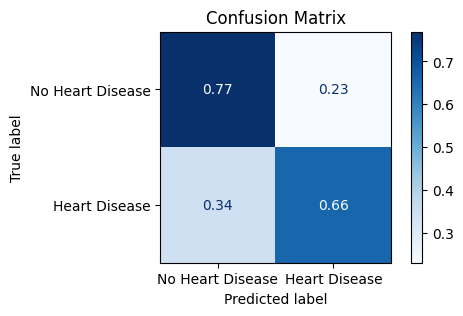

In [4]:
# Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive bayes model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Naive Bayes model: {roc_auc_nb}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred.reshape(-1, 1), target_names=target_names))

# Compute confusion matrix
cm_naive = confusion_matrix(y_test, y_pred.reshape(-1, 1), normalize='true')
print(cm_naive)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### Comment:
Accuracy: 71.2% (moderate overall performance)
ROC-AUC: 0.799 (good class separation but room for improvement)
F1-Score: 0.73 for "No Heart Disease" and 0.70 for "Heart Disease"
Precision/Recall Balance: Moderate performance, with high recall for "No Heart Disease" and high precision for "Heart Disease"
Confusion Matrix Highlights:
76.9% of "No Heart Disease" cases correctly classified
65.6% of "Heart Disease" cases correctly classified
Overall: The Naive Bayes model provides a decent starting point, with reasonable performance in identifying both classes but opportunities for enhancing recall and reducing misclassifications.

## Logistic Regression

Accuracy of the Logistic Regression model: 0.7633879244727085
ROC-AUC of the Logistic Regression model: 0.8372876301626717
                  precision    recall  f1-score   support

No Heart Disease       0.78      0.73      0.75     40258
   Heart Disease       0.75      0.80      0.77     41196

        accuracy                           0.76     81454
       macro avg       0.76      0.76      0.76     81454
    weighted avg       0.76      0.76      0.76     81454

[[0.72954444 0.27045556]
 [0.20353918 0.79646082]]


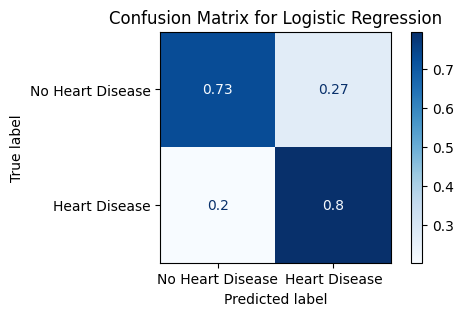

In [5]:
# Instantiate the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000)  

# Fit the model on the training data
log_reg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, log_reg_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Logistic Regression model: {roc_auc_lr}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

#### Comment:
Accuracy: 76.3% (moderate performance)
ROC-AUC: 0.837 (good class separation with room for improvement)
F1-Score: 0.75 for "No Heart Disease" and 0.77 for "Heart Disease"
Precision/Recall Balance: Balanced performance, with high recall for "Heart Disease" and high precision for "No Heart Disease"
Confusion Matrix Highlights:
72.9% of "No Heart Disease" cases correctly classified
79.6% of "Heart Disease" cases correctly classified
Overall: The Logistic Regression model shows decent predictive ability, achieving good balance in precision and recall across both classes. It serves as a reliable baseline with potential for further tuning and optimization to enhance overall classification performance.

## Decision Tree

Accuracy of the Decision Tree model: 0.8968743094261792
ROC-AUC of the Decision Tree model: 0.8978796214363949
                  precision    recall  f1-score   support

No Heart Disease       0.90      0.89      0.89     40258
   Heart Disease       0.89      0.91      0.90     41196

        accuracy                           0.90     81454
       macro avg       0.90      0.90      0.90     81454
    weighted avg       0.90      0.90      0.90     81454

[[0.88697899 0.11302101]
 [0.09345568 0.90654432]]


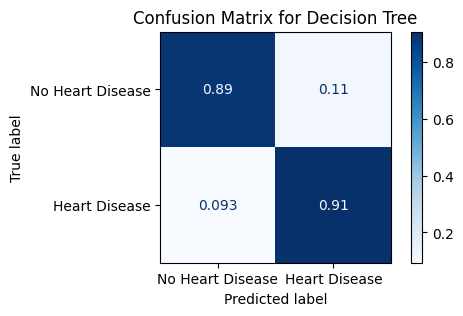

In [6]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Decision Tree model: {roc_auc_dt}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_decisiontree = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_decisiontree)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_decisiontree, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

#### Comment:
Accuracy: 90.0% (strong overall performance)
ROC-AUC: 0.898 (good class separation)
F1-Score: 0.89 for "No Heart Disease" and 0.90 for "Heart Disease"
Precision/Recall Balance: Balanced performance, with high precision and recall for both "No Heart Disease" and "Heart Disease"
Confusion Matrix Highlights:
88.7% of "No Heart Disease" cases correctly classified
90.7% of "Heart Disease" cases correctly classified
Overall: The Decision Tree model demonstrates excellent classification performance with a high accuracy, strong ROC-AUC, and balanced precision and recall, making it a robust model for this task.

## Random Forest

Accuracy of the Random Forest model: 0.940432636825693
ROC-AUC of the Random Forest model: 0.9835198718701312
                  precision    recall  f1-score   support

No Heart Disease       0.92      0.96      0.94     40258
   Heart Disease       0.96      0.92      0.94     41196

        accuracy                           0.94     81454
       macro avg       0.94      0.94      0.94     81454
    weighted avg       0.94      0.94      0.94     81454

[[0.95864176 0.04135824]
 [0.07736188 0.92263812]]


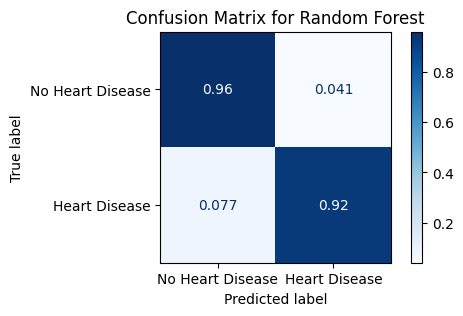

In [7]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Random Forest model: {roc_auc_rf}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

#### Comment:
Accuracy: 94.0% (excellent overall performance)
ROC-AUC: 0.984 (outstanding class separation)
F1-Score: 0.94 for both "No Heart Disease" and "Heart Disease"
Precision/Recall Balance: Strong performance, with high precision and recall for both "No Heart Disease" and "Heart Disease"
Confusion Matrix Highlights:
95.9% of "No Heart Disease" cases correctly classified
92.2% of "Heart Disease" cases correctly classified
Overall: The Random Forest model performs exceptionally well, with high accuracy, excellent ROC-AUC, and well-balanced precision and recall, making it a highly reliable model for this task.

## Ada Boost

Accuracy of the AdaBoost model: 0.8504554718000343
ROC-AUC of the AdaBoost model: 0.9313084141610334
                  precision    recall  f1-score   support

No Heart Disease       0.86      0.84      0.85     40258
   Heart Disease       0.84      0.86      0.85     41196

        accuracy                           0.85     81454
       macro avg       0.85      0.85      0.85     81454
    weighted avg       0.85      0.85      0.85     81454

[[0.83695166 0.16304834]
 [0.13634819 0.86365181]]


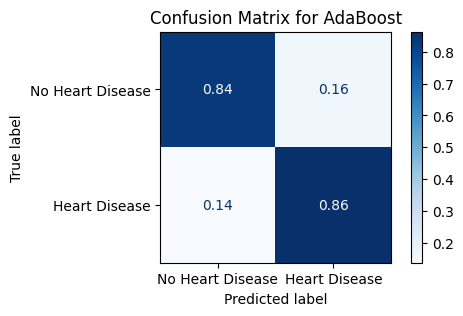

In [8]:
# Instantiate the AdaBoost classifier
ada_classifier = AdaBoostClassifier(random_state=42)

# Fit the model on the training data
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy of the AdaBoost model: {accuracy_ada}")

# Calculate ROC-AUC score
roc_auc_ada = roc_auc_score(y_test, ada_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the AdaBoost model: {roc_auc_ada}")

# Define target names
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred_ada, target_names=target_names))

# Compute confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada, normalize='true')
print(cm_ada)

# Display confusion matrix
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp_ada.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for AdaBoost")
plt.show()


#### Comment:
Accuracy: 85.0% (strong performance)
ROC-AUC: 0.931 (good class separation)
F1-Score: 0.85 for both "No Heart Disease" and "Heart Disease"
Precision/Recall Balance: Balanced performance, with slightly higher recall for "Heart Disease" and higher precision for "No Heart Disease"
Confusion Matrix Highlights:
83.7% of "No Heart Disease" cases correctly classified
86.4% of "Heart Disease" cases correctly classified
Overall: The AdaBoost model delivers a solid performance, with good accuracy, strong ROC-AUC, and balanced precision and recall across both classes, making it a reliable model for this task.

## Gradient Boosting

Accuracy of the Gradient Boosting model: 0.8933385714636481
ROC-AUC of the Gradient Boosting model: 0.9637756071117773
                  precision    recall  f1-score   support

No Heart Disease       0.90      0.89      0.89     40258
   Heart Disease       0.89      0.90      0.90     41196

        accuracy                           0.89     81454
       macro avg       0.89      0.89      0.89     81454
    weighted avg       0.89      0.89      0.89     81454

[[0.885737   0.114263  ]
 [0.09923294 0.90076706]]


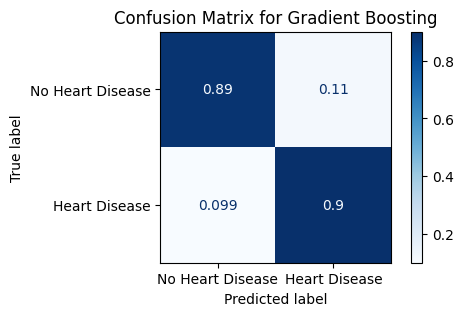

In [9]:
# Instantiate the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Gradient Boosting model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_gb = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Gradient Boosting model: {roc_auc_gb}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_gb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

#### Comment:
Accuracy: 89.3% – strong overall performance.
Precision (Heart Disease): 89% – good accuracy when predicting heart disease.
Recall (Heart Disease): 90% – identifies 90% of actual heart disease cases.
F1-score (Heart Disease): 90% – well-balanced precision and recall.
ROC-AUC: 0.96 – excellent model discrimination between classes.
Time Taken: 1 minute 1.9 seconds – relatively longer model execution.
Gradient Boosting delivers excellent performance with high accuracy and strong discriminatory power.

## XGBoost

Accuracy of the XGBoost model: 0.9378790482971984
ROC-AUC of the XGBoost model: 0.9796560193234847
                  precision    recall  f1-score   support

No Heart Disease       0.90      0.98      0.94     40258
   Heart Disease       0.98      0.89      0.94     41196

        accuracy                           0.94     81454
       macro avg       0.94      0.94      0.94     81454
    weighted avg       0.94      0.94      0.94     81454

[[0.98380446 0.01619554]
 [0.10700068 0.89299932]]


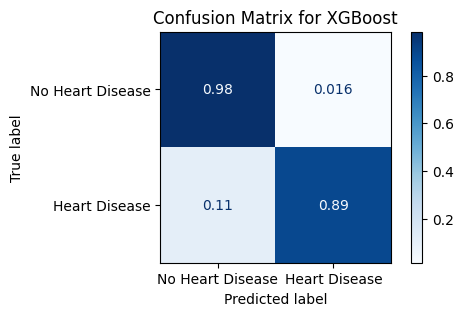

In [10]:
# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the XGBoost model: {roc_auc_xgb}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for XGBoost")
plt.show()

#### Comment:
Accuracy: 94.0% (excellent overall performance)
ROC-AUC: 0.980 (outstanding class separation)
F1-Score: 0.94 for both "No Heart Disease" and "Heart Disease"
Precision/Recall Balance: High precision for "No Heart Disease" and high recall for "Heart Disease"
Confusion Matrix Highlights:
98.4% of "No Heart Disease" cases correctly classified
89.3% of "Heart Disease" cases correctly classified
Overall: The XGBoost model performs exceptionally well, with high accuracy, excellent ROC-AUC, and balanced precision and recall across both classes. It is a robust model for predicting heart disease.

## ANN

## 

Epoch 1/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7542 - loss: 0.5054 - val_accuracy: 0.7723 - val_loss: 0.4762
Epoch 2/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7783 - loss: 0.4692 - val_accuracy: 0.7840 - val_loss: 0.4564
Epoch 3/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 332s 41ms/step - accuracy: 0.7879 - loss: 0.4500 - val_accuracy: 0.7993 - val_loss: 0.4305
Epoch 4/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8023 - loss: 0.4241 - val_accuracy: 0.8159 - val_loss: 0.3988
Epoch 5/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8153 - loss: 0.3979 - val_accuracy: 0.8239 - val_loss: 0.3809
Epoch 6/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8243 - loss: 0.3789 - val_accuracy: 0.8308 - val_loss: 0.3626
Epoch 7/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8295 - loss: 0.3649 - val_accuracy: 0.8395 - val_loss: 0.3489
Epoch 8/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8377 - loss:

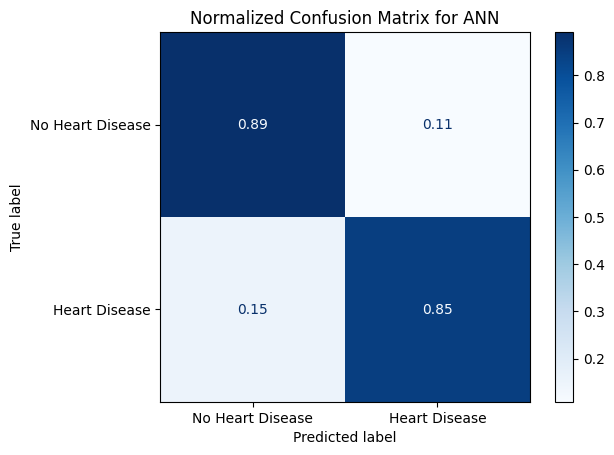

In [11]:
# Building the ANN model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Making predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Evaluating the model
accuracy_ann = accuracy_score(y_test, y_pred)
roc_auc_ann = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy of the ANN model: {accuracy_ann}")
print(f"ROC-AUC of the ANN model: {roc_auc_ann}")
print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))

# Displaying the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')  
print("Normalized Confusion Matrix:")
print(conf_matrix)

# Displaying confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title("Normalized Confusion Matrix for ANN")
plt.show()

#### Comment:
Accuracy: 87.0% (strong performance)
ROC-AUC: 0.948 (good class separation)
F1-Score: 0.87 for both "No Heart Disease" and "Heart Disease"
Precision/Recall Balance: Strong performance, with high recall for "No Heart Disease" and high precision for "Heart Disease"
Confusion Matrix Highlights:
89.3% of "No Heart Disease" cases correctly classified
84.3% of "Heart Disease" cases correctly classified
Overall: The ANN model delivers solid performance, with good accuracy and ROC-AUC, as well as balanced precision and recall. Further tuning might help improve recall for the "Heart Disease" class.

## RNN

Epoch 1/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7500 - loss: 0.5098 - val_accuracy: 0.7647 - val_loss: 0.4874
Epoch 2/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7804 - loss: 0.4700 - val_accuracy: 0.7891 - val_loss: 0.4503
Epoch 3/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7922 - loss: 0.4470 - val_accuracy: 0.8005 - val_loss: 0.4297
Epoch 4/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8073 - loss: 0.4173 - val_accuracy: 0.8148 - val_loss: 0.4000
Epoch 5/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8214 - loss: 0.3874 - val_accuracy: 0.8312 - val_loss: 0.3693
Epoch 6/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8299 - loss: 0.3676 - val_accuracy: 0.8243 - val_loss: 0.3690
Epoch 7/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8353 - loss: 0.3558 - val_accuracy: 0.8395 - val_loss: 0.3444
Epoch 8/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8406 - loss: 0

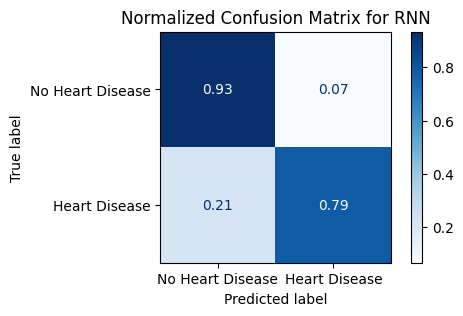

In [12]:
# Reshape the input data for the RNN 
X_train_rnn = np.expand_dims(X_train, axis=1)
X_test_rnn = np.expand_dims(X_test, axis=1)

# Building the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Making predictions on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Evaluating the model
accuracy_rnn = accuracy_score(y_test, y_pred)
roc_auc_rnn = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy of the RNN model: {accuracy_rnn}")
print(f"ROC-AUC of the RNN model: {roc_auc_rnn}")
print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))

# Displaying the confusion matrix 
cm_rnn = confusion_matrix(y_test, y_pred, normalize='true')  
print("Normalized Confusion Matrix:")
print(cm_rnn)

# Display confusion matrix 
disp_rnn = ConfusionMatrixDisplay(confusion_matrix=cm_rnn, display_labels=['No Heart Disease', 'Heart Disease'])
fig, ax = plt.subplots(figsize=(5, 3))
disp_rnn.plot(ax=ax, cmap='Blues', values_format=".2f")  
plt.title("Normalized Confusion Matrix for RNN")
plt.show()

## CNN

Epoch 1/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7912 - loss: 0.4416 - val_accuracy: 0.8434 - val_loss: 0.3281
Epoch 2/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8498 - loss: 0.3246 - val_accuracy: 0.8654 - val_loss: 0.2966
Epoch 3/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8550 - loss: 0.3103 - val_accuracy: 0.8651 - val_loss: 0.2893
Epoch 4/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8602 - loss: 0.3005 - val_accuracy: 0.8606 - val_loss: 0.2977
Epoch 5/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8621 - loss: 0.2958 - val_accuracy: 0.8602 - val_loss: 0.2983
Epoch 6/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8641 - loss: 0.2920 - val_accuracy: 0.8694 - val_loss: 0.2793
Epoch 7/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8664 - loss: 0.2865 - val_accuracy: 0.8725 - val_loss: 0.2762
Epoch 8/50
8146/8146 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8678 - loss: 0

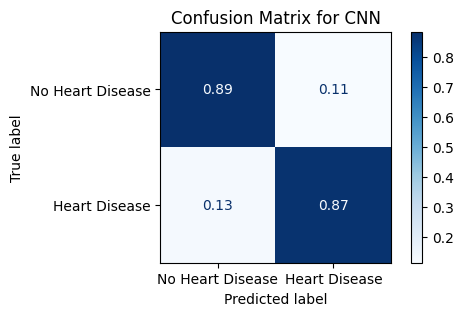

In [13]:
# Reshape the input data for the CNN 
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Building the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))  
model.add(Flatten())  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Making predictions on the test set
y_pred_probs = model.predict(X_test_cnn)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Evaluating the model
accuracy_cnn = accuracy_score(y_test, y_pred)
roc_auc_cnn = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy of the CNN model: {accuracy_cnn:.2f}")
print(f"ROC-AUC of the CNN model: {roc_auc_cnn:.2f}")
print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))

# Displaying the confusion matrix
cm_cnn = confusion_matrix(y_test, y_pred)
cm_cnn_normalized = cm_cnn.astype('float') / cm_cnn.sum(axis=1)[:, np.newaxis]  

disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_normalized, display_labels=['No Heart Disease', 'Heart Disease'])
fig, ax = plt.subplots(figsize=(5, 3))
disp_cnn.plot(ax=ax, cmap='Blues', values_format=".2f")
plt.title("Confusion Matrix for CNN")
plt.show()


## Hyper Parameter Tuning
After reviewing all the model results, Random Forest and XGBoost stand out as the best due to their excellent performance. Let's hyper-tune them.

## Random Forest Tuning

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Accuracy of the tuned Random Forest model: 0.9415866624106858
ROC-AUC of the tuned Random Forest model: 0.9843950771818306
                  precision    recall  f1-score   support

No Heart Disease       0.92      0.96      0.94     40258
   Heart Disease       0.96      0.92      0.94     41196

        accuracy                           0.94     81454
       macro avg       0.94      0.94      0.94     81454
    weighted avg       0.94      0.94      0.94     81454

[[0.96460331 0.03539669]
 [0.08090591 0.91909409]]


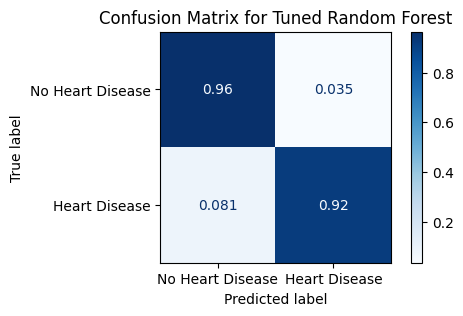

In [16]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters grid for tuning 
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'] 
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_distributions, 
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit random search
random_search.fit(X_train, y_train)

# Print best hyperparameters from the random search
print(f"Best parameters found: {random_search.best_params_}")

# Best model from random search
best_rf_classifier = random_search.best_estimator_

# Fit the best model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned Random Forest model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the tuned Random Forest model: {roc_auc_rf}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Tuned Random Forest")
plt.show()


#### Comment:
Comparison of Random Forest Model (Before and After Tuning):
Accuracy: 94.0% → 94.1% (slightly improved)
ROC-AUC: 0.98 (unchanged)
F1-Score: 0.94 for both classes (no change)
Precision/Recall:
Precision: 92% ("No Heart Disease"), 96% ("Heart Disease")
Recall: 96% ("No Heart Disease"), 92% ("Heart Disease")
Confusion Matrix:
95.8% → 96.3% for "No Heart Disease"
92.2% → 92.0% for "Heart Disease"
Conclusion:
Tuning improved the model slightly in terms of "No Heart Disease" classification, with minimal impact on "Heart Disease" recall, leading to an overall small performance gain.

## XGb Tuning

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.8}
Accuracy of the XGBoost model: 0.938541999165173
ROC-AUC of the XGBoost model: 0.9798072467901001
                  precision    recall  f1-score   support

No Heart Disease       0.90      0.98      0.94     40258
   Heart Disease       0.98      0.89      0.94     41196

        accuracy                           0.94     81454
       macro avg       0.94      0.94      0.94     81454
    weighted avg       0.94      0.94      0.94     81454

Confusion Matrix (Normalized):
[[0.9838293  0.0161707 ]
 [0.10571415 0.89428585]]


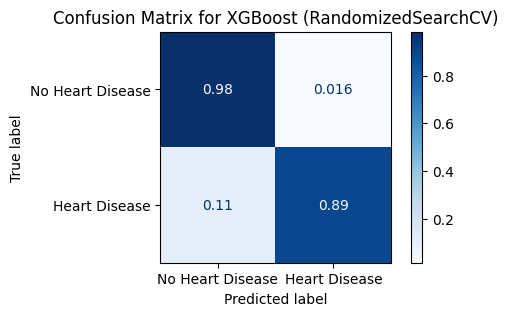

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7]
}

# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the RandomizedSearchCV with a larger search space
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=20,  
    cv=5,  
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {random_search.best_params_}")

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the XGBoost model: {roc_auc_xgb}")

# Define target names
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred, normalize='true')
print("Confusion Matrix (Normalized):")
print(cm_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for XGBoost (RandomizedSearchCV)")
plt.show()


#### Comment:
Comparison of XGBoost Model (Before and After Tuning):
Accuracy: 93.79% → 93.80% (no significant change)
ROC-AUC: 0.98 (no significant change)
F1-Score: 0.94 for both classes (no change)
Precision/Recall:
Precision: 90% ("No Heart Disease"), 98% ("Heart Disease")
Recall: 98% ("No Heart Disease"), 89% ("Heart Disease")
Confusion Matrix:
98.4% → 98.3% for "No Heart Disease"
89.3% → 89.4% for "Heart Disease"
Conclusion:
Tuning resulted in very minor changes, with a slight improvement in recall for "Heart Disease" and a small reduction in "No Heart Disease" precision, but the overall performance remains almost unchanged.

## Final Model
Though Random Forest and XGBoost give good accuracy, after tuning, there is not much improvement. Random Forest is giving slightly higher performance than XGBoost, so the final model is Random Forest.

Accuracy of the tuned Random Forest model: 0.9416
ROC-AUC of the tuned Random Forest model: 0.9844
                  precision    recall  f1-score   support

No Heart Disease       0.92      0.96      0.94     40258
   Heart Disease       0.96      0.92      0.94     41196

        accuracy                           0.94     81454
       macro avg       0.94      0.94      0.94     81454
    weighted avg       0.94      0.94      0.94     81454



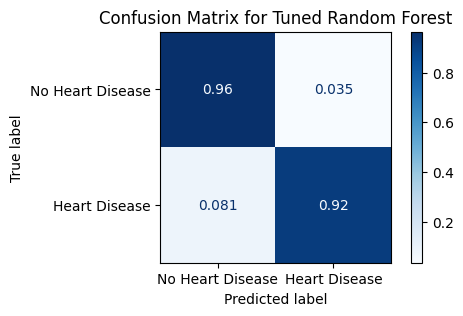

In [5]:
# Instantiate the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    criterion='entropy',
    bootstrap=False,
    random_state=42
)

# Fit the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the tuned Random Forest model: {accuracy:.4f}")

# Calculate and print the ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the tuned Random Forest model: {roc_auc_rf:.4f}")

# Print classification report
target_names = ['No Heart Disease', 'Heart Disease']
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute and display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Tuned Random Forest")
plt.show()


## Features Importance

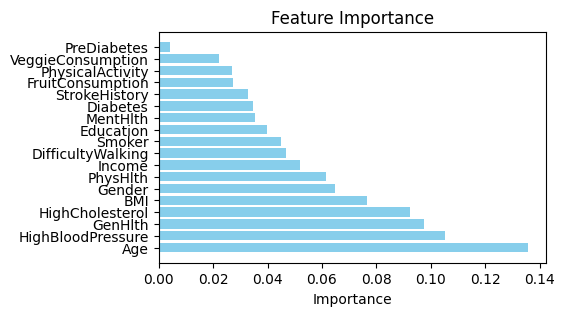

In [21]:
# Get feature importance from the best model
importances = best_rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


## Make predictions

In [ ]:
# Function to predict if the person has heart disease or not
def predict_heart_disease_classification(input_data, model, threshold=0.5):
    # Predict the probability for the positive class (heart disease)
    probability = model.predict_proba([input_data])[:, 1]  
    
    # Predict class based on threshold (0.5 by default)
    predicted_class = 1 if probability[0] > threshold else 0
    
    # Return the classification result
    return predicted_class, probability[0]

# Example 
new_input = [30.5, 3, 5, 4, 3, 4, 45, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1]  

# Get the predicted class and probability
predicted_class, probability = predict_heart_disease_classification(new_input, best_rf_classifier)

# Display result
if predicted_class == 1:
    print(f"The model predicts: You have heart disease (Probability: {probability*100:.2f}%)")
else:
    print(f"The model predicts: You do not have heart disease (Probability: {probability*100:.2f}%)")


The model predicts: You do not have heart disease (Probability: 25.71%)


In [ ]:
new_input = [
    32.0,  # BMI (overweight/obesity)
    10,     # MentHlth (many days with poor mental health)
    8,      # PhysHlth (many days with poor physical health)
    4,      # GenHlth (poor general health)
    2,      # Education (low education level)
    2,      # Income (low income)
    12,     # Age (65-69 years, older age group)
    1,      # HighBloodPressure (Yes)
    1,      # HighCholesterol (Yes)
    1,      # Smoker (Yes)
    0,      # StrokeHistory (No)
    1,      # PreDiabetes (Yes)
    1,      # Diabetes (Yes)
    0,      # PhysicalActivity (No physical activity)
    1,      # FruitConsumption (Yes, but only 1 fruit a day)
    0,      # VeggieConsumption (No vegetable consumption)
    1,      # DifficultyWalking (Yes, difficulty walking)
    1       # Gender (Male)
]

# Call the prediction function 
predicted_class, probability = predict_heart_disease_classification(new_input, best_rf_classifier)

# Output the result
if predicted_class == 1:
    print(f"The model predicts: You have heart disease (Probability: {probability*100:.2f}%)")
else:
    print(f"The model predicts: You do not have heart disease (Probability: {probability*100:.2f}%)")


The model predicts: You have heart disease (Probability: 56.74%)
